## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import os

In [12]:
import scipy.stats

In [3]:
os.getcwd()

'/Users/sohaib/FlightPredictions'

In [189]:
passengers = pd.read_csv('DataPreparation/passengers.csv')

In [190]:
passengers.head()

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,0.0,6.0,205170.0,0.0,0.0,37737.0,106181.0,548.0,495.0,471.0,5V,20408,Tatonduk Outfitters Limited d/b/a Everts Air A...,D,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,1,10299,30299,ANC,"Anchorage, AK",US,United States,13970,33970,OTZ,"Kotzebue, AK",US,United States,6,640,2,2018,6,2,G,DU
1,1,33.0,33.0,1259910.0,5280.0,4619.0,5680.0,82.0,692.0,4035.0,3435.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,10397,30397,ATL,"Atlanta, GA",US,United States,13198,33198,MCI,"Kansas City, MO",US,United States,6,656,1,2016,4,2,F,DU
2,2,111.0,110.0,2187460.0,8353.0,7305.0,0.0,0.0,109.0,6349.0,2733.0,CP,21167,Compass Airlines,D,CP,Compass Airlines,2,2,14679,33570,SAN,"San Diego, CA",US,United States,12892,32575,LAX,"Los Angeles, CA",US,United States,6,673,1,2015,8,1,F,DU
3,3,0.0,2.0,6800.0,18.0,16.0,0.0,0.0,21.0,24.0,16.0,H6,20336,Hageland Aviation Service,D,H6,Hageland Aviation Service,1,5,15554,35554,VAK,"Chevak, AK",US,United States,14718,34718,SCM,"Scammon Bay, AK",US,United States,4,416,1,2017,4,1,L,DU
4,4,1.0,1.0,43400.0,190.0,140.0,0.0,0.0,1826.0,302.0,262.0,B6,20409,JetBlue Airways,D,B6,JetBlue Airways,3,3,12478,31703,JFK,"New York, NY",US,United States,10140,30140,ABQ,"Albuquerque, NM",US,United States,6,699,1,2016,11,4,F,DU


In [122]:
flights = pd.read_csv('DataPreparation/flights.csv')

In [123]:
flights.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
0,0,2018-06-15,DL,DL_CODESHARE,DL,6230,G7,N378CA,6230,14492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,1,2019-09-02,AA,AA,AA,1939,AA,N562UW,1939,11057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,2,2019-12-27,UA,UA,UA,2293,UA,N77867,2293,12892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
3,3,2019-08-26,AS,AS,AS,426,AS,N493AS,426,14747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,4,2019-12-23,UA,UA_CODESHARE,UA,5977,OO,N795SK,5977,11292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [124]:
flightsprocessed = flights.copy()

In [125]:
flightsprocessed.drop(columns = ['cancellation_code','no_name'], inplace=True)

In [127]:
test = flightsprocessed.dropna(subset=['arr_delay'])

In [131]:
test = test.dropna(subset=['air_time'])

In [311]:
test2.isnull().sum().sort_values(ascending=False)

longest_add_gtime        679935
total_add_gtime          679935
first_dep_time           679935
security_delay           553394
late_aircraft_delay      553394
nas_delay                553394
weather_delay            553394
carrier_delay            553394
distance                      0
diverted                      0
dup                           0
crs_elapsed_time              0
actual_elapsed_time           0
air_time                      0
flights                       0
fl_date                       0
mkt_unique_carrier            0
month                         0
hour                          0
haul                          0
flight_speed                  0
state                         0
cancelled                     0
arr_delay                     0
arr_time                      0
crs_arr_time                  0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                      0
op_carri

In [312]:
test2.cancelled.value_counts()

0.0    684223
Name: cancelled, dtype: int64

In [314]:
pd.DataFrame.to_csv(test2,'test2.csv',index=False)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [20]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

In [6]:
y = flights['arr_delay']

Manually computing t-test with critical score

In [27]:
y.mean()/(y.std()/np.sqrt(y.count()))

8.397576954359705

In [26]:
y.describe()

count    692087.000000
mean          0.440005
std          43.589746
min        -117.000000
25%         -16.000000
50%          -8.000000
75%           4.000000
max        2973.000000
Name: arr_delay, dtype: float64

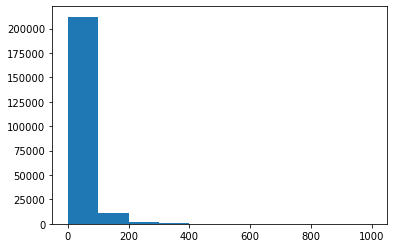

In [11]:
pyplot.hist(y, range=(0,1000))
pyplot.show()

In [13]:
scipy.stats.ttest_1samp(y,0)

Ttest_1sampResult(statistic=nan, pvalue=nan)

In [23]:
stat, p = shapiro(y)
stat, p

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(nan, 1.0)

In [19]:
stat, p = normaltest(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=nan, p=nan


In [22]:
result = anderson(y)
print('stat=%.3f' % (result.statistic))
result.critical_values

stat=nan


array([0.576, 0.656, 0.787, 0.918, 1.092])

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [136]:
X = test[['arr_delay','month']]

In [143]:
X.groupby(by='month').mean().sort_values(by='arr_delay',ascending=False)

,arr_delay
month,
6,10.427129
7,9.029800
8,8.920519
2,6.732096
5,6.484299
12,4.969669
4,4.233036
1,3.879101
10,3.210737


<span style="color: red;">This tells us that the biggest delays happen in the summer when the number of flights are the highest</span>

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [273]:
test1.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,month,hour,haul,flight_speed,state
0,2018-06-15,DL,DL_CODESHARE,DL,6230,G7,N378CA,6230,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",1942,1958.0,16.0,28.0,2026.0,2132.0,6.0,2124,2138.0,14.0,0.0,0.0,N,102.0,100.0,66.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,20,Short,378.181818,OH
1,2019-09-02,AA,AA,AA,1939,AA,N562UW,1939,11057,CLT,"Charlotte, NC",13204,MCO,"Orlando, FL",1635,1630.0,-5.0,13.0,1643.0,1755.0,4.0,1827,1759.0,-28.0,0.0,0.0,N,112.0,89.0,72.0,1.0,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,16,Short,390.000000,FL
2,2019-12-27,UA,UA,UA,2293,UA,N77867,2293,12892,LAX,"Los Angeles, CA",11292,DEN,"Denver, CO",832,831.0,-1.0,17.0,848.0,1138.0,6.0,1200,1144.0,-16.0,0.0,0.0,N,148.0,133.0,110.0,1.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,8,Short,470.181818,CO
3,2019-08-26,AS,AS,AS,426,AS,N493AS,426,14747,SEA,"Seattle, WA",12478,JFK,"New York, NY",1405,1403.0,-2.0,30.0,1433.0,2205.0,13.0,2235,2218.0,-17.0,0.0,0.0,N,330.0,315.0,272.0,1.0,2422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,14,Long,534.264706,NY
4,2019-12-23,UA,UA_CODESHARE,UA,5977,OO,N795SK,5977,11292,DEN,"Denver, CO",10372,ASE,"Aspen, CO",1715,1712.0,-3.0,18.0,1730.0,1803.0,2.0,1814,1805.0,-9.0,0.0,0.0,N,59.0,53.0,33.0,1.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,17,Short,227.272727,CO


In [274]:
import re

In [ ]:
re.get()

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [275]:
test1[['hour','taxi_in']].groupby('hour').mean().sort_values(by='taxi_in',ascending=False)

,taxi_in
hour,
2,8.953368
7,8.685786
3,8.549080
6,8.493621
1,8.280426
18,8.233535
5,8.158780
4,8.139818
17,8.007749


In [277]:
test1[['hour','taxi_out']].groupby('hour').mean().sort_values(by='taxi_out',ascending=False)

,taxi_out
hour,
9,18.957062
23,18.793045
21,18.718389
8,18.486640
18,18.467974
20,18.394027
10,18.279866
19,17.972104
24,17.941176


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [33]:
from scipy.stats import pearsonr
from random import sample

In [31]:
z.isnull().sum()

6449

In [32]:
y.isnull().sum()

7913

In [39]:
ysamp = np.random.choice(y,10000)

zsamp = np.random.choice(z,10000)

In [45]:
np.isnan(np.sum(ysamp))

False

In [46]:
ysamp = ysamp[~np.isnan(ysamp)]
zsamp = zsamp[~np.isnan(zsamp)]

In [29]:
z = flights['dep_delay']

In [52]:
zsamp = np.random.choice(zsamp,9895)

In [53]:
pearsonr(ysamp,zsamp)

(-0.005772972489708893, 0.5658387778877771)

In [91]:
ysamp = test['arr_delay'][:10000]
zsamp = test['dep_delay'][:10000]

In [92]:
pearsonr(ysamp,zsamp)

(0.9596728557980144, 0.0)

In [93]:
znegatves = pd.Series.apply(zsamp,lambda x: x<0)

In [98]:
sum(znegatves)/len(zsamp)

0.6656

#### **Task 6**: How many states cover 50% of US air traffic? 

In [266]:
test1['dest_city_name'][1][-2:]

'FL'

In [269]:
test1['state'] = pd.Series.apply(test1['dest_city_name'],lambda x: x[-2:])

In [272]:
test1[['state','flights']].groupby('state').sum().sort_values('flights',ascending=False)

,flights
state,
CA,75172.0
TX,67494.0
FL,49762.0
IL,42493.0
GA,36570.0
NY,34886.0
NC,31461.0
CO,26718.0
DC,20202.0


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [146]:
z = test['dep_delay']
t = test['air_time']
testdf = pd.concat([z,t],axis=1)

In [119]:
def convertor(X):
    if X < 0 or X == 0:
        X = 0
    elif X > 0:
        X = 1
    return X

In [147]:
testdf['dummy'] = pd.Series.apply(z,lambda z: 0 if z <= 0 else 1)

In [148]:
testdf.dummy.value_counts()

0    452368
1    233568
Name: dummy, dtype: int64

In [192]:
testdf[['dummy','air_time']].groupby(by='dummy').mean()

,air_time
dummy,
0,105.426454
1,112.876550


In [250]:
test1['flight_speed'] = test1['distance']/(test1['air_time']/60)

In [316]:
test2['dummydelay'] = pd.Series.apply(test2['dep_delay'],lambda z: 0 if z <= 0 else 1)

In [317]:
test2[['dummydelay','flight_speed']].groupby('dummydelay').mean()

,flight_speed
dummydelay,
0,395.552285
1,404.994671


In [318]:
test2

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,month,hour,haul,flight_speed,state,proportional_activity,dummydelay
0,2018-06-15,DL,DL_CODESHARE,DL,6230,G7,N378CA,6230,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",1942,1958.0,16.0,28.0,2026.0,2132.0,6.0,2124,2138.0,14.0,0.0,0.0,N,102.0,100.0,66.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,20,Short,378.181818,OH,0.008601,1
1,2018-11-03,F9,F9,F9,1128,F9,N236FR,1128,14492,RDU,"Raleigh/Durham, NC",14843,SJU,"San Juan, PR",1220,1226.0,6.0,13.0,1239.0,1551.0,6.0,1550,1557.0,7.0,0.0,0.0,N,210.0,211.0,192.0,1.0,1433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,12,Medium,447.812500,PR,0.008601,1
2,2018-10-18,DL,DL,DL,1774,DL,N363NW,1774,14492,RDU,"Raleigh/Durham, NC",10397,ATL,"Atlanta, GA",1851,1850.0,-1.0,16.0,1906.0,2008.0,19.0,2022,2027.0,5.0,0.0,0.0,N,91.0,97.0,62.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,19,Short,344.516129,GA,0.008601,0
3,2018-01-25,DL,DL,DL,1803,DL,N913DL,1803,14492,RDU,"Raleigh/Durham, NC",10397,ATL,"Atlanta, GA",1352,1343.0,-9.0,16.0,1359.0,1501.0,8.0,1528,1509.0,-19.0,0.0,0.0,N,96.0,86.0,62.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13,Short,344.516129,GA,0.008601,0
4,2018-10-08,AA,AA,AA,683,AA,N567UW,683,14492,RDU,"Raleigh/Durham, NC",11057,CLT,"Charlotte, NC",710,723.0,13.0,22.0,745.0,826.0,6.0,815,832.0,17.0,0.0,0.0,N,65.0,69.0,41.0,1.0,130.0,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN,10,7,Short,190.243902,NC,0.008601,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684218,2019-08-26,F9,F9,F9,235,F9,N341FR,235,10562,BFM,"Mobile, AL",11292,DEN,"Denver, CO",1829,1811.0,-18.0,13.0,1824.0,1954.0,16.0,2034,2010.0,-24.0,0.0,0.0,N,185.0,179.0,150.0,1.0,1132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,18,Medium,452.800000,CO,0.000007,0
684219,2019-06-15,F9,F9,F9,235,F9,N317FR,235,10562,BFM,"Mobile, AL",11292,DEN,"Denver, CO",1854,1853.0,-1.0,14.0,1907.0,2123.0,29.0,2059,2152.0,53.0,0.0,0.0,N,185.0,239.0,196.0,1.0,1132.0,0.0,0.0,53.0,0.0,0.0,NaN,NaN,NaN,6,19,Medium,346.530612,CO,0.000007,0
684220,2019-11-11,F9,F9,F9,235,F9,N361FR,235,10562,BFM,"Mobile, AL",11292,DEN,"Denver, CO",1900,1857.0,-3.0,9.0,1906.0,2054.0,41.0,2109,2135.0,26.0,0.0,0.0,N,189.0,218.0,168.0,1.0,1132.0,0.0,0.0,26.0,0.0,0.0,NaN,NaN,NaN,11,19,Medium,404.285714,CO,0.000007,0
684221,2019-10-14,F9,F9,F9,235,F9,N235FR,235,10562,BFM,"Mobile, AL",11292,DEN,"Denver, CO",1853,1848.0,-5.0,13.0,1901.0,2046.0,15.0,2109,2101.0,-8.0,0.0,0.0,N,196.0,193.0,165.0,1.0,1132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,19,Medium,411.636364,CO,0.000007,0


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [165]:
hrs = test['wheels_off']

In [183]:
def convert(X):
    r = []
    for i in X:
        i = str(int(i))
        if len(i) == 3:
            r.append(int(i[0]))
        elif len(i) == 4:
            r.append(int(i[0:2]))
    return r
            

In [194]:
def convert(i):
    i = str(int(i))
    if len(i) == 3:
        i = int(i[0])
    elif len(i) == 4:
        i = int(i[0:2])
    return i
            

In [186]:
pd.set_option('max_columns', None)

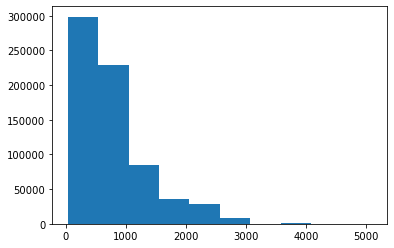

In [198]:
pyplot.hist(test['distance'])
pyplot.show()

In [200]:
bins = [0, 1000, 2000, np.inf]
labels = ['Short','Medium','Long']
test['haul'] = pd.cut(test['distance'], bins = bins,labels = labels)

In [201]:
test.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,month,hour,haul
0,2018-06-15,DL,DL_CODESHARE,DL,6230,G7,N378CA,6230,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",1942,1958.0,16.0,28.0,2026.0,2132.0,6.0,2124,2138.0,14.0,0.0,0.0,N,102.0,100.0,66.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,20,Short
1,2019-09-02,AA,AA,AA,1939,AA,N562UW,1939,11057,CLT,"Charlotte, NC",13204,MCO,"Orlando, FL",1635,1630.0,-5.0,13.0,1643.0,1755.0,4.0,1827,1759.0,-28.0,0.0,0.0,N,112.0,89.0,72.0,1.0,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,16,Short
2,2019-12-27,UA,UA,UA,2293,UA,N77867,2293,12892,LAX,"Los Angeles, CA",11292,DEN,"Denver, CO",832,831.0,-1.0,17.0,848.0,1138.0,6.0,1200,1144.0,-16.0,0.0,0.0,N,148.0,133.0,110.0,1.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,8,Short
3,2019-08-26,AS,AS,AS,426,AS,N493AS,426,14747,SEA,"Seattle, WA",12478,JFK,"New York, NY",1405,1403.0,-2.0,30.0,1433.0,2205.0,13.0,2235,2218.0,-17.0,0.0,0.0,N,330.0,315.0,272.0,1.0,2422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,14,Long
4,2019-12-23,UA,UA_CODESHARE,UA,5977,OO,N795SK,5977,11292,DEN,"Denver, CO",10372,ASE,"Aspen, CO",1715,1712.0,-3.0,18.0,1730.0,1803.0,2.0,1814,1805.0,-9.0,0.0,0.0,N,59.0,53.0,33.0,1.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,17,Short
5,2019-08-23,UA,UA_CODESHARE,UA,5016,C5,N27190,5016,11618,EWR,"Newark, NJ",11278,DCA,"Washington, DC",1635,1839.0,124.0,36.0,1915.0,2010.0,9.0,1758,2019.0,141.0,0.0,0.0,N,83.0,100.0,55.0,1.0,199.0,41.0,0.0,17.0,0.0,83.0,NaN,NaN,NaN,8,19,Short
6,2018-02-01,DL,DL,DL,1522,DL,N946DN,1522,10397,ATL,"Atlanta, GA",14730,SDF,"Louisville, KY",819,1022.0,123.0,15.0,1037.0,1126.0,4.0,943,1130.0,107.0,0.0,0.0,N,84.0,68.0,49.0,1.0,321.0,107.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2,10,Short
7,2018-09-21,AA,AA_CODESHARE,AA,4446,YX,N430YX,4446,12953,LGA,"New York, NY",12339,IND,"Indianapolis, IN",1955,1946.0,-9.0,20.0,2006.0,2150.0,4.0,2215,2154.0,-21.0,0.0,0.0,N,140.0,128.0,104.0,1.0,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,20,Short
8,2019-09-05,DL,DL,DL,2256,DL,N915AT,2256,12191,HOU,"Houston, TX",10397,ATL,"Atlanta, GA",1945,1940.0,-5.0,12.0,1952.0,2229.0,7.0,2247,2236.0,-11.0,0.0,0.0,N,122.0,116.0,97.0,1.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,19,Short
9,2018-11-11,AS,AS,AS,494,AS,N471AS,494,14747,SEA,"Seattle, WA",14683,SAT,"San Antonio, TX",1151,1147.0,-4.0,20.0,1207.0,1731.0,3.0,1746,1734.0,-12.0,0.0,0.0,N,235.0,227.0,204.0,1.0,1774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,12,Medium


In [195]:
test['hour'] = pd.Series.apply(hrs,convert)

In [218]:
test['hour'] = test["hour"].astype(str).astype(int)


In [241]:
test1[['hour']].describe()

,hour
count,684223.000000
mean,13.362432
std,4.970375
min,1.000000
25%,9.000000
50%,13.000000
75%,18.000000
max,24.000000


In [234]:
r = []
for i in test['hour']:
    if i > 24:
         r.append(i)

In [236]:
len(r)

1713

In [240]:
print(test.shape,test1.shape)

(685936, 43) (684223, 43)


In [238]:
test1 = test.copy()


In [239]:
test1 = test1[test1['hour']<=24]

In [246]:
test1[['haul','hour']].groupby('haul').describe()

hour                                                 
           count       mean       std  min  25%   50%   75%   max
haul                                                             
Short   512263.0  13.438031  4.928970  1.0  9.0  13.0  18.0  24.0
Medium  134213.0  12.956621  4.964617  1.0  9.0  13.0  17.0  24.0
Long     37747.0  13.779373  5.443799  1.0  9.0  13.0  18.0  24.0

In [249]:
test1[['haul','hour']].groupby(['haul']).apply(pd.DataFrame.mode).reset_index(drop=True)

,haul,hour
0,Short,6
1,Medium,7
2,Long,8


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [281]:
testdf9 = test1[['origin','dest','flights']]

In [285]:
BusiestAirportsOrigin = testdf9.groupby('origin').count().sort_values(by='flights',ascending=False).flights

In [286]:
BusiestAirportsDepartures = testdf9.groupby('dest').count().sort_values(by='flights',ascending=False).flights

In [291]:
AirportsSum = BusiestAirportsOrigin.sum()

In [294]:
businessindicator =  BusiestAirportsOrigin/AirportsSum

In [297]:
businessindicator = pd.DataFrame(businessindicator)

In [299]:
businessindicator.columns = ['origin','proportional_activity']

In [304]:
len(test1['origin'].unique())

375

In [305]:
test2 = pd.merge(test1,businessindicator,how='inner')

In [308]:
test2.drop(columns = 'businessindicator',inplace=True)

In [290]:
test1.shape

(684223, 45)

In [151]:
testdf9['route'] = test['origin'] + test['dest']

<ipython-input-151-fd942eebd3fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf9['route'] = test['origin'] + test['dest']


In [155]:
common_routes = testdf9['route'].value_counts()[:100]

In [156]:
common_routes

SFOLAX    1594
LAXSFO    1594
ORDLGA    1278
LGAORD    1225
LAXLAS    1157
          ... 
SLCLAX     564
ATLCLT     564
PHLATL     562
LGADCA     560
HOUDAL     558
Name: route, Length: 100, dtype: int64

In [319]:
pd.DataFrame.to_csv(common_routes,'common_routes.csv')

In [323]:
test2.shape

(684223, 47)

In [ ]:
test2.

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [325]:
test2['route'] = test2['origin'] + test2['dest']

In [357]:
quickdf = test2[['route','arr_delay']].groupby('route').mean()

In [359]:
quickdf.reset_index(inplace=True)
quickdf

,route,arr_delay
0,ABEATL,3.513514
1,ABEBNA,95.666667
2,ABECLT,-0.373626
3,ABEDTW,12.659341
4,ABEFLL,18.666667
...,...,...
6633,YAKCDV,-5.411765
6634,YAKJNU,-9.533333
6635,YKMSEA,6.696429
6636,YUMDFW,-11.941176


In [360]:
quickdf.columns = ['route','mean delay for route']

In [362]:
pd.DataFrame.to_csv(quickdf,'mean_delay_for_route.csv',index=False)

In [333]:
test3 = pd.merge(test2,quickdf,how='inner',on='route')

In [334]:
test3

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,month,hour,haul,flight_speed,state,proportional_activity,dummydelay,route,mean delay for route
0,2018-06-15,DL,DL_CODESHARE,DL,6230,G7,N378CA,6230,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",1942,1958.0,16.0,28.0,2026.0,2132.0,6.0,2124,2138.0,14.0,0.0,0.0,N,102.0,100.0,66.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,20,Short,378.181818,OH,0.008601,1,RDUCLE,24.321429
1,2018-07-31,F9,F9,F9,463,F9,N221FR,463,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",1543,1631.0,48.0,25.0,1656.0,1807.0,6.0,1715,1813.0,58.0,0.0,0.0,N,92.0,102.0,71.0,1.0,416.0,0.0,0.0,10.0,0.0,48.0,NaN,NaN,NaN,7,16,Short,351.549296,OH,0.008601,1,RDUCLE,24.321429
2,2019-07-30,DL,DL_CODESHARE,DL,6229,G7,N186GJ,6229,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",2049,2047.0,-2.0,24.0,2111.0,2214.0,5.0,2233,2219.0,-14.0,0.0,0.0,N,104.0,92.0,63.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21,Short,396.190476,OH,0.008601,0,RDUCLE,24.321429
3,2018-07-17,DL,DL_CODESHARE,DL,6234,G7,N354CA,6234,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",2059,2234.0,95.0,22.0,2256.0,2.0,11.0,2237,13.0,96.0,0.0,0.0,N,98.0,99.0,66.0,1.0,416.0,0.0,0.0,4.0,0.0,92.0,NaN,NaN,NaN,7,22,Short,378.181818,OH,0.008601,1,RDUCLE,24.321429
4,2019-08-04,DL,DL_CODESHARE,DL,6229,G7,N186GJ,6229,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",2049,2039.0,-10.0,20.0,2059.0,2158.0,5.0,2233,2203.0,-30.0,0.0,0.0,N,104.0,84.0,59.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,20,Short,423.050847,OH,0.008601,0,RDUCLE,24.321429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684218,2019-08-26,F9,F9,F9,235,F9,N341FR,235,10562,BFM,"Mobile, AL",11292,DEN,"Denver, CO",1829,1811.0,-18.0,13.0,1824.0,1954.0,16.0,2034,2010.0,-24.0,0.0,0.0,N,185.0,179.0,150.0,1.0,1132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,18,Medium,452.800000,CO,0.000007,0,BFMDEN,11.800000
684219,2019-06-15,F9,F9,F9,235,F9,N317FR,235,10562,BFM,"Mobile, AL",11292,DEN,"Denver, CO",1854,1853.0,-1.0,14.0,1907.0,2123.0,29.0,2059,2152.0,53.0,0.0,0.0,N,185.0,239.0,196.0,1.0,1132.0,0.0,0.0,53.0,0.0,0.0,NaN,NaN,NaN,6,19,Medium,346.530612,CO,0.000007,0,BFMDEN,11.800000
684220,2019-11-11,F9,F9,F9,235,F9,N361FR,235,10562,BFM,"Mobile, AL",11292,DEN,"Denver, CO",1900,1857.0,-3.0,9.0,1906.0,2054.0,41.0,2109,2135.0,26.0,0.0,0.0,N,189.0,218.0,168.0,1.0,1132.0,0.0,0.0,26.0,0.0,0.0,NaN,NaN,NaN,11,19,Medium,404.285714,CO,0.000007,0,BFMDEN,11.800000
684221,2019-10-14,F9,F9,F9,235,F9,N235FR,235,10562,BFM,"Mobile, AL",11292,DEN,"Denver, CO",1853,1848.0,-5.0,13.0,1901.0,2046.0,15.0,2109,2101.0,-8.0,0.0,0.0,N,196.0,193.0,165.0,1.0,1132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,19,Medium,411.636364,CO,0.000007,0,BFMDEN,11.800000


In [337]:
test3.nunique().sort_values(ascending=False)

flight_speed             51750
op_carrier_fl_num         7067
mkt_carrier_fl_num        7058
route                     6638
tail_num                  6419
mean delay for route      5502
distance                  1594
arr_time                  1440
wheels_on                 1440
dep_time                  1425
crs_arr_time              1414
wheels_off                1400
crs_dep_time              1349
arr_delay                 1086
first_dep_time            1082
dep_delay                 1060
carrier_delay              806
fl_date                    730
actual_elapsed_time        640
air_time                   620
late_aircraft_delay        592
crs_elapsed_time           585
nas_delay                  496
weather_delay              485
dest                       375
dest_airport_id            375
origin                     375
origin_airport_id          375
dest_city_name             367
origin_city_name           367
proportional_activity      304
total_add_gtime            181
longest_

In [348]:
quickdf = test3[['mkt_unique_carrier','arr_delay']].groupby('mkt_unique_carrier').mean()

In [349]:
quickdf.reset_index(inplace=True)


In [345]:
quickdf.drop(columns='index',inplace=True)

In [351]:
quickdf.columns = ['mkt_unique_carrier','mean delay based on air carrier']

In [353]:
test4 = pd.merge(test3,quickdf,how='inner',on='mkt_unique_carrier')

In [340]:
test3['mkt_carrier'].value_counts()

AA    176392
DL    151397
UA    132446
WN    116739
AS     36799
B6     25897
NK     16327
F9     10902
G4      8778
HA      7852
VX       694
Name: mkt_carrier, dtype: int64

In [354]:
test4

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,month,hour,haul,flight_speed,state,proportional_activity,dummydelay,route,mean delay for route,mean delay based on air carrier
0,2018-06-15,DL,DL_CODESHARE,DL,6230,G7,N378CA,6230,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",1942,1958.0,16.0,28.0,2026.0,2132.0,6.0,2124,2138.0,14.0,0.0,0.0,N,102.0,100.0,66.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,20,Short,378.181818,OH,0.008601,1,RDUCLE,24.321429,2.490683
1,2019-07-30,DL,DL_CODESHARE,DL,6229,G7,N186GJ,6229,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",2049,2047.0,-2.0,24.0,2111.0,2214.0,5.0,2233,2219.0,-14.0,0.0,0.0,N,104.0,92.0,63.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21,Short,396.190476,OH,0.008601,0,RDUCLE,24.321429,2.490683
2,2018-07-17,DL,DL_CODESHARE,DL,6234,G7,N354CA,6234,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",2059,2234.0,95.0,22.0,2256.0,2.0,11.0,2237,13.0,96.0,0.0,0.0,N,98.0,99.0,66.0,1.0,416.0,0.0,0.0,4.0,0.0,92.0,NaN,NaN,NaN,7,22,Short,378.181818,OH,0.008601,1,RDUCLE,24.321429,2.490683
3,2019-08-04,DL,DL_CODESHARE,DL,6229,G7,N186GJ,6229,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",2049,2039.0,-10.0,20.0,2059.0,2158.0,5.0,2233,2203.0,-30.0,0.0,0.0,N,104.0,84.0,59.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,20,Short,423.050847,OH,0.008601,0,RDUCLE,24.321429,2.490683
4,2019-05-30,DL,DL_CODESHARE,DL,6229,G7,N331CA,6229,14492,RDU,"Raleigh/Durham, NC",11042,CLE,"Cleveland, OH",2030,2021.0,-9.0,25.0,2046.0,2152.0,16.0,2213,2208.0,-5.0,0.0,0.0,N,103.0,107.0,66.0,1.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,20,Short,378.181818,OH,0.008601,0,RDUCLE,24.321429,2.490683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684218,2018-01-15,HA,HA,HA,466,HA,N588HA,466,14222,PPG,"Pago Pago, TT",12173,HNL,"Honolulu, HI",2330,2349.0,19.0,17.0,6.0,613.0,7.0,600,620.0,20.0,0.0,0.0,N,330.0,331.0,307.0,1.0,2599.0,8.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,1,6,Long,507.947883,HI,0.000015,1,PPGHNL,68.200000,0.178935
684219,2018-09-24,HA,HA,HA,466,HA,N380HA,466,14222,PPG,"Pago Pago, TT",12173,HNL,"Honolulu, HI",2320,2307.0,-13.0,15.0,2322.0,532.0,8.0,550,540.0,-10.0,0.0,0.0,N,330.0,333.0,310.0,1.0,2599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,23,Long,503.032258,HI,0.000015,0,PPGHNL,68.200000,0.178935
684220,2019-07-08,HA,HA,HA,466,HA,N381HA,466,14222,PPG,"Pago Pago, TT",12173,HNL,"Honolulu, HI",2320,2325.0,5.0,14.0,2339.0,608.0,58.0,550,706.0,76.0,0.0,0.0,N,330.0,401.0,329.0,1.0,2599.0,71.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,7,23,Long,473.981763,HI,0.000015,1,PPGHNL,68.200000,0.178935
684221,2019-05-09,HA,HA,HA,466,HA,N370HA,466,14222,PPG,"Pago Pago, TT",12173,HNL,"Honolulu, HI",2320,2309.0,-11.0,15.0,2324.0,521.0,10.0,545,531.0,-14.0,0.0,0.0,N,325.0,322.0,297.0,1.0,2599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,23,Long,525.050505,HI,0.000015,0,PPGHNL,68.200000,0.178935


In [356]:
pd.DataFrame.to_csv(quickdf,'mean_delay_based_on_air_carrier.csv')

In [355]:
quickdf

,mkt_unique_carrier,mean delay based on air carrier
0,AA,6.393277
1,AS,0.429957
2,B6,10.439433
3,DL,2.490683
4,F9,10.748853
5,G4,8.746298
6,HA,0.178935
7,NK,4.486434
8,UA,9.017267
9,VX,2.891931


In [363]:
pd.DataFrame.to_csv(test4,'flightsprocessed.csv')